In [1]:
import cv2 as cv
import os
import numpy as np
from matplotlib import pyplot as plt

In [35]:
VIDEO_PATH = "sample_videos/cool_fox.mp4"

TOP_CROP = 100
BOTTOM_CROP = 100
LEFT_CROP = 0
RIGHT_CROP = 0

FRAME_WIDTH = 576
FRAME_HEIGHT = 324

In [67]:
# Crops frame by n pixels in each direction
def crop_frame(frame, top_crop, bottom_crop, left_crop, right_crop):
    return frame[top_crop:-bottom_crop, left_crop:-right_crop]


# Extracts frames from given video and resizes them, taking a frame every n milliseconds
def extract_frames(video_path, interval, target_height, target_width):
    video = cv.VideoCapture(video_path)
    
    frames = []
    success, frame = video.read()
    total_frames = video.get(cv.CAP_PROP_FRAME_COUNT)
    i = 0
    # Continue until 
    while success and video.get(cv.CAP_PROP_POS_FRAMES) < total_frames:
        # Save current frame
        frames.append(cv.resize(frame, (target_width, target_height)))

        # Exit the loop if the video is unrealistically long
        assert i < 500, "Maximum number of frames exceeded"

        # Jump <interval> seconds forward
        video.set(cv.CAP_PROP_POS_MSEC, i * interval)
        success, frame = video.read()
        i += 1
    return frames

In [4]:
# Mean squared error between 2 frames
def mse(frame1, frame2):
    # Cast uint8 to int32 to avoid overflow
    frame1 = frame1.astype(np.int32)
    frame2 = frame2.astype(np.int32)
    
    assert frame1.shape == frame2.shape, "Shapes do not match"

    # Calculate MSE
    mse = np.mean((frame1 - frame2) ** 2)
    return mse

In [5]:
# Saves frame if its MSE with ref. frame exceeds threshold, then sets it as new ref. frame
def pick_frames_sliding(frames, threshold):
    # Set first frame as reference frame
    reference_frame = frames[0]

    picked_frames = []
    for frame in frames:
        if mse(frame, reference_frame) > threshold:
            # Save the current frame and overwrite ref. frame
            reference_frame = frame
            picked_frames.append(frame)

    # Throw an error if no frames were picked
    assert len(picked_frames) > 0, "0 frames picked from the video"
    
    return picked_frames


In [6]:
frames = extract_frames(VIDEO_PATH, 500, FRAME_HEIGHT, FRAME_HEIGHT)

In [7]:
picked_frames = pick_frames_sliding(frames, 5)

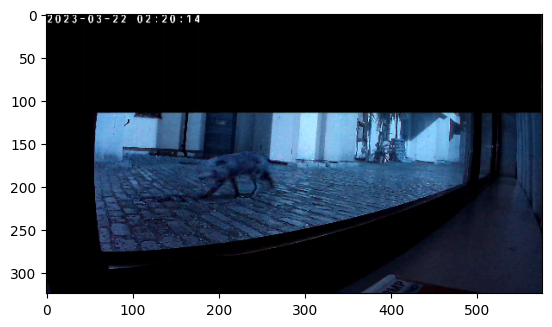

In [33]:
len(picked_frames)
plt.imshow(picked_frames[10])

In [72]:
crop_frame(picked_frames[0], TOP_CROP, BOTTOM_CROP, LEFT_CROP, RIGHT_CROP)

array([], shape=(124, 0, 3), dtype=uint8)

In [70]:
picked_frames[0].shape

(324, 576, 3)